<a href="https://colab.research.google.com/github/9more/Projects/blob/main/Infront_Booking_Sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Daily booking sheet. Sheet generated from filtering a database of multiple rows and columns.

In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sys
path = input('paste the url here ')
sheet_id = path.split('/d/')[1].split('/edit')[0]
csv_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'
data = pd.read_csv(csv_url, skiprows=1)
today=pd.to_datetime('today').strftime('%d/%m/%Y')


paste the url here https://docs.google.com/spreadsheets/d/1nxhT5HHzAPnSxYW0qv5P75RsN0u5Ow16CCDlxMcKMvs/edit?usp=sharing


In [7]:
def get_df(df):
  today=pd.to_datetime('today').strftime('%d-%m-%Y')
  df.columns=df.columns.str.lower().str.strip()
  if 'competition' in df.columns:
      df.set_index('competition', inplace=True)
  df = df[['date','start gmt', 'home', 'away','srt / rtmp url','igame channel','ingest method', 'sport']]
  df.sort_values(by=['start gmt'], inplace=True)
  df['start gmt'] = pd.to_datetime(df['start gmt']).dt.tz_localize('UTC').dt.tz_convert('Europe/London')
  df['date'] = pd.to_datetime(df['date'], format='mixed')
  df['srt / rtmp url'] = df['srt / rtmp url'].apply(lambda x: x.replace(x.split('srt')[1],\
                        ' link hidden') if 'srt' in x  else x)
  df.fillna('to be announed later', inplace=True)
  df1= df[df['date']==today]
  df1.to_csv(f'Booking Sheet for {today}.csv')
  return df1

def graphs(df, i, j='barh',t=None):
  Title=input('Enter Chart Title ')
  color=input('Enter Chart Color ')
  if i == 'competition':
    df.sort_values(by=['start gmt'], inplace=True)
    df.index.value_counts().plot(kind=j, color=color, figsize=(10,5), title=Title, fontsize=12)
  else:
    df[i].value_counts().plot(kind=j, color=color, figsize=(10,5), title=Title, fontsize=12)

In [ ]:
get_df(data.copy())

Enter Chart Title Summary of Competitions for Today
Enter Chart Color #362011


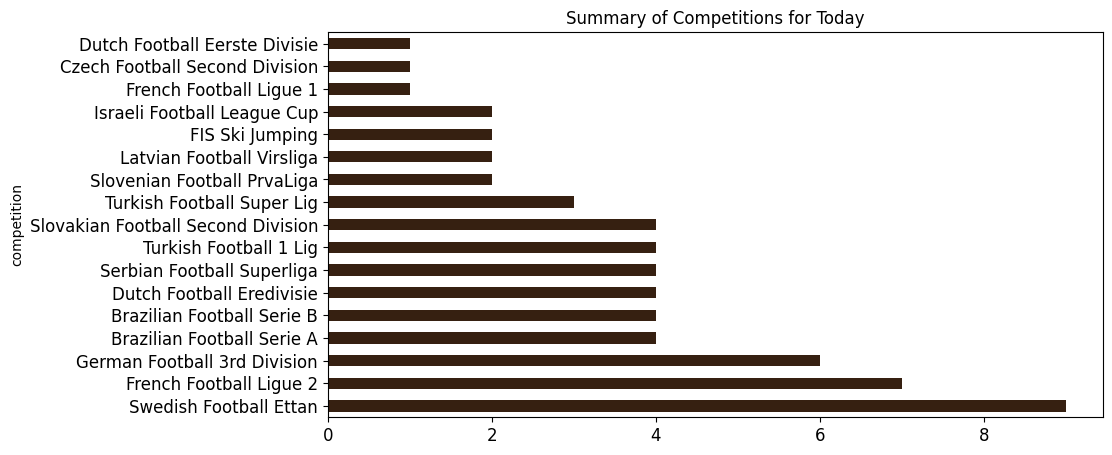

In [11]:
graphs(get_df(data),'competition')

Enter Chart Title Pie Chart Showing Summary of Sports for Today
Enter Chart Color #A6B28B


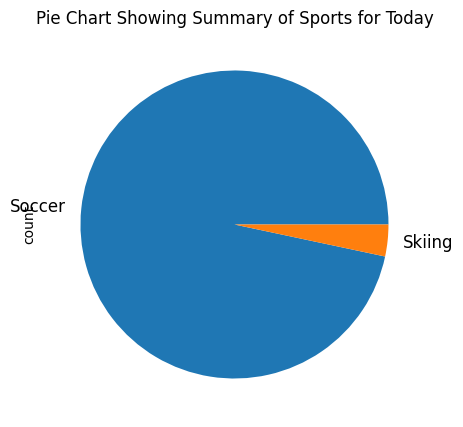

In [10]:
graphs(get_df(data),'sport', 'pie')

In [ ]:
df=pd.read_excel('/content/sample_df/Infront Bookings.xlsx',skiprows=1, sheet_name='July 25')
today=pd.to_datetime('today').strftime('%Y-%m-%d')
df.columns=df.columns.str.lower().str.strip()
df.columns
df.set_index('competition', inplace=True)
df = df[['date','start gmt', 'home', 'away','srt / rtmp url','igame channel','ingest method', 'sport']]
pd.to_datetime(df['date'])
df1= df[df['date']==today]
df1.sort_values(by=['start gmt'], inplace=True)
df1.index.value_counts().plot(kind='barh', color='red', figsize=(10,5), title='Today\'s Games', fontsize=12)

In [ ]:
class Students:
    import pandas as pd
    color=['#BCA88D','#3E3F29', '#F1F0E4']
    def __init__(self,y):
        self.y=y
    def pand(self):
        return pd.DataFrame(self.y)
    def sum(self,i=0):
        x=self.pand()
        return x.sum(axis=i)
    def std(self,i=0):
        x=self.pand()
        return x.std(axis=i)
    def graph(self):
      x=self.pand()
      x.plot(kind='bar', color=self.color, figsize=(10,5), title='Today\'s Games', fontsize=12)

In [ ]:
d={'a':[2,9,3],'b':[8,4,5], 'c':[5,1,9]}
first= Students(d)
print(first.sum(1))
print(first.std(1))
first.graph()